In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import nltk

In [46]:
spam =pd.read_csv("../data/spam.csv")

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [3]:
# You might have seen this error message before; 
# there are symbols in the data file that are invalid 
# unicode characters.  Apparently this file isn't
# in unicode. 

In [ ]:
da

In [62]:
## CLEANUP PARSER
#  Loop through the data and 
t = []
f1 = []
f2 =[]
f3 = [] 
f4 = [] 
f5 = [] 


import re
with open("../data/spam.csv", encoding="latin-1") as f:
    for line in f:
        fields = line.strip().split(",")
        t.append(len(fields))
        f1.append(fields[0])
        f2.append("\t".join(fields[1:-3]))
        f3.append("\t".join(fields[ -3:]))
        #f4.append(fields[ -2])
        #f5.append(fields[ -1])

       #print ( f1, f2, fL)
        #print( line )
     
        t.append(len(fields))
len(f1), len(f2), len(f3)


(5575, 5575, 5575)

In [63]:
# recall .value_counts() only works for pandas datastructures; numpy and basic python 
# have different methods to make simple histograms:
from collections import Counter
Counter(t).items()

dict_items([(5, 8580), (6, 1860), (8, 158), (7, 426), (2, 2), (4, 6), (15, 2), (9, 40), (10, 34), (11, 28), (13, 8), (18, 2), (12, 4)])

In [67]:
Counter(f3).items()

dict_items([('\t\t', 5523), (' PO Box 5249\t" MK17 92H. 450Ppw 16"""\t', 2), ('ham\t"Hi. Wk been ok - on hols now! Yes on for a bit of a run. Forgot that i have hairdressers appointment at four so need to get home n shower beforehand. Does that cause prob for u?\\""', 1), (' the person is definitely special for u..... But if the person is so special\t why to miss them\t" just Keep-in-touch\\"" gdeve.."""', 1), ('" HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\"""""\t\t', 1), ('" wanted to say hi. HI!!!\\"" Stop? Send STOP to 62468"""\t\t', 1), ('"this wont even start........ Datz confidence.."""\t\t', 2), ('GN\tGE\t"GNT:-)"""', 2), ('".;-):-D"""\t\t', 1), ('"just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\"""""\t\t', 1), ('" bt not his girlfrnd... G o o d n i g h t . . .@"""\t\t', 3), ('" I\'ll come up"""\t\t', 1), ('" don\'t miss ur best life for anything... Gud nyt..."""\t\t', 2), ('" just as a shop has to give a guarantee on what they sell. B. G

In [39]:
# Who is using 12 commas in their texts? ,,,,,,,,,,,,,,?

In [40]:
americancorpus = pd.read_csv("../data/master_corpus.txt", sep="\t")
len(americancorpus)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 55495: invalid continuation byte

In [ ]:
# Depending on whether I've cut-and-pasted this, I might get a 
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4  
americancorpus = pd.read_csv("../data/master_corpus.txt", sep="\t", encoding="latin-1")
len(americancorpus)

4934

In [ ]:
## CLEANUP
t = []
import re
with open("../data/master_corpus.csv") as f:
    for line in f:
       
        fields = line.strip().split(",")
        #print(len(fields))
        f1 = fields[0]
        f2 = fields[1:-3]
        fL = fields [ -3:]
       #print ( f1, f2, fL)
        #print( line )
        
        t.append(len(fields))
from collections import Counter
Counter(t).items()

In [30]:
## CLEANUP
t = []
import re
with open("../data/master_corpus.txt", encoding="latin-1") as f:
    for line in f:
       
        fields = line.strip().split("\t")
        #print(len(fields))
        f1 = fields[0]
        f2 = fields[1:-3]
        fL = fields [ -3:]
        #print ( f1, f2, fL)
        #print( line )
        
        t.append(len(fields))
from collections import Counter
Counter(t).items()

dict_items([(5, 4840), (3, 190), (1, 43)])

In [17]:
counttabs

0

In [68]:
spam =pd.read_csv("../data/spam.csv", encoding="latin-1")

In [69]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [70]:
spam.iloc[:,3].value_counts()

 MK17 92H. 450Ppw 16"                         2
GE                                            2
 why to miss them                             1
U NO THECD ISV.IMPORTANT TOME 4 2MORO\""      1
i wil tolerat.bcs ur my someone..... But      1
 ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""    1
whoever is the KING\"!... Gud nyt"            1
 TX 4 FONIN HON                               1
 \"OH No! COMPETITION\". Who knew             1
IåÕL CALL U\""                                1
Name: Unnamed: 3, dtype: int64

In [71]:
spam.iloc[0]

v1                                                          ham
v2            Go until jurong point, crazy.. Available only ...
Unnamed: 2                                                  NaN
Unnamed: 3                                                  NaN
Unnamed: 4                                                  NaN
Name: 0, dtype: object

In [73]:
# Ok, I don't know what those last three columns are for, but I don't like them.
spamclean = []
for line in open("../data/spam.csv", encoding="latin-1"):
        a = line.find(",")
        spamclean.append((line[0:a], line[a+1:]))

In [74]:
spam = pd.DataFrame(spamclean)

In [75]:
spam = spam.drop(labels=0, axis=0)  #only do this once

In [76]:
spam

,0,1
1,ham,"""Go until jurong point, crazy.. Available only..."
2,ham,"Ok lar... Joking wif u oni...,,,\n"
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"""Nah I don't think he goes to usf, he lives ar..."
...,...,...
5570,spam,"""This is the 2nd time we have tried 2 contact ..."
5571,ham,"Will Ì_ b going to esplanade fr home?,,,\n"
5572,ham,"""Pity, * was in mood for that. So...any other ..."
5573,ham,The guy did some bitching but I acted like i'd...


In [77]:
spam =spam.rename({0: "label", 1:"text"}, axis=1)

In [78]:
# Create two dataframes.. 
s1 = spam.query("label == 'ham'")
s2 = spam.query("label == 'spam'")

In [79]:
# Create two giant strings... 
s1text = s1.text.str.cat()
s2text = s2.text.str.cat()

In [80]:
# tokenize the strings (proably split on whitespace)
tok1 = nltk.word_tokenize(s1text)
tok2 = nltk.word_tokenize(s2text)

In [81]:
# And create frequency distribution objects.
d1 = nltk.FreqDist(tok1)
d2 = nltk.FreqDist(tok2)

In [82]:
d1  # This will act like a dictionary.

FreqDist({',': 15969, '.': 2932, "''": 2556, 'I': 1917, 'you': 1688, 'to': 1546, '?': 1375, '...': 1139, 'the': 1032, 'a': 977, ...})

In [83]:
# These methods look like number of token counts
d1.N(), d2.N()  

(100259, 23616)

In [84]:
# and these look like the number of distinct tokens.
len(d1.keys()), len(d2.keys()) 

(9525, 3756)

In [ ]:
# Ten thousand words.  This is reasonable.


In [85]:
teststring = "Hey, what's up rich?"
teststring2 = "Do you want free airtime?"

In [86]:
# here is the frequency data I need.
# Word, ham_occur, ham_total, spam_occur, spam_total
print("Word\tham_occ\tham_tot\tspam_occ\tspam_tot")

for token in nltk.word_tokenize(teststring):
    print(token, '\t', end="" )
    print(d1[token] , '\t',  d1.N(),'\t', d2[token], 
          '\t', d2.N())

Word	ham_occ	ham_tot	spam_occ	spam_tot
Hey 	89 	 100259 	 5 	 23616
, 	15969 	 100259 	 2612 	 23616
what 	146 	 100259 	 14 	 23616
's 	422 	 100259 	 68 	 23616
up 	260 	 100259 	 19 	 23616
rich 	3 	 100259 	 0 	 23616
? 	1375 	 100259 	 175 	 23616


In [ ]:
testset = ["Hey there, I am Maya with GP Research. We're surveying IL residents. Can you respond to a few questions?",
           "Headed down now.",
"The banana chocolate bread is delicious! All that’s left is one small heel, which I will dunk in my coffee tomorrow.",
"Hurry! For a limited time, add a FREE line to your account. Really, it's on us–no strings attached." ]


In [ ]:
# I'm going to reorganize the data from two dictionaries into a dataframe 
# so I can make scatterplots.
counts = pd.DataFrame()
for k in set(d1.keys()).union(set(d2.keys())):
    counts = counts.append( { "word": k , "d1": d1[k], "d2": d2[k]}, ignore_index=True)

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_38339/4047625331.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts = counts.append( { "word": k , "d1": d1[k], "d2": d2[k]}, ignore_index=True)
/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_38339/4047625331.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts = counts.append( { "word": k , "d1": d1[k], "d2": d2[k]}, ignore_index=True)
/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_38339/4047625331.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts = counts.append( { "word": k , "d1": d1[k], "d2": d2[k]}, ignore_index=True)
/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_38339/4047625331.py:5: FutureWarning: 

<ipython-input-23-3bfd3be96f2c>:8: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(ranks.index), np.log10(ranks.d1+0.1))


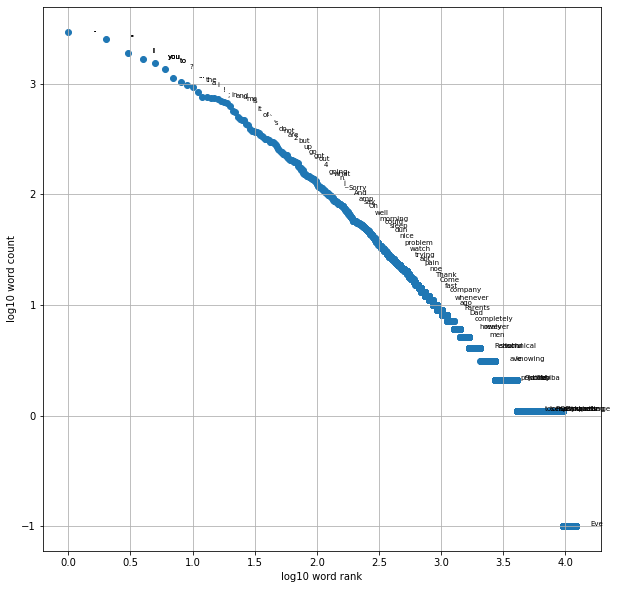

In [23]:
# We can make the plot more expressive by putting labels on the dots, since each
# dot is a word.  Because of flaws in matplotlib, we have to use ugly log10 axes here;
# plotting labels on points does not play nicely with log-log axes.

fig, ax = plt.subplots(figsize=(10,10))
ranks = counts.sort_values("d1", ascending=False).reset_index()

ax.scatter(np.log10(ranks.index), np.log10(ranks.d1+0.1))
ax.set_xlabel("log10 word rank")
ax.set_ylabel("log10 word count")

ax.grid()
for i in np.power(10, np.linspace(0,4,100)).astype("int"):
        ax.text(np.log10(ranks.index[i])+0.2, np.log10(ranks.loc[i,"d1"]+.1), ranks.loc[i,"word"],  fontsize=7)


In [ ]:
len(counts)

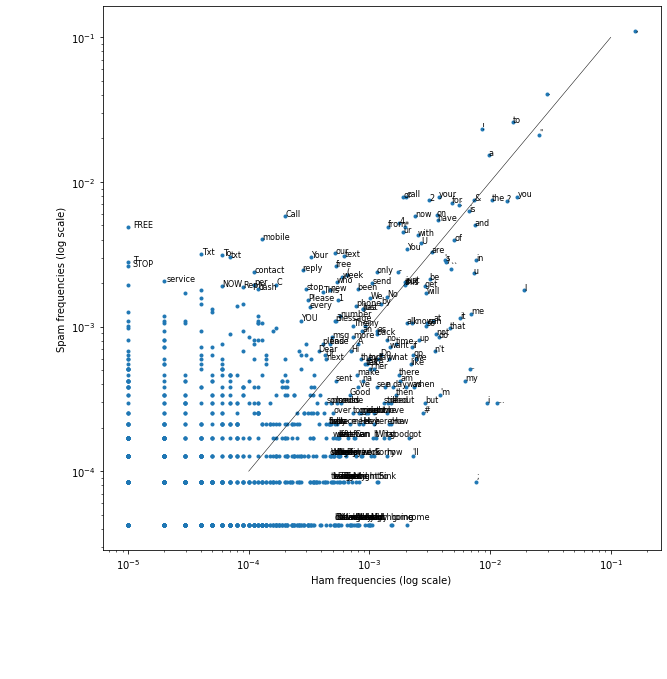

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.loglog(counts.d1/d1.N(), counts.d2/d2.N(),'.')
ax.plot([1E-4,1E-1], [1E-4,1E-1], color='k', linestyle='-',linewidth=0.5)
ax.set_xlabel('Ham frequencies (log scale)')
ax.set_ylabel('Spam frequencies (log scale)')
for i in counts.index:
    if counts.loc[i, "d1"] + counts.loc[i, "d2"] >=50 :
        ax.annotate( counts.loc[i,"word"], ((counts.loc[i, "d1"]+.1)/d1.N(), (counts.loc[i,"d2"]+.1)/d2.N()), fontsize=8 )

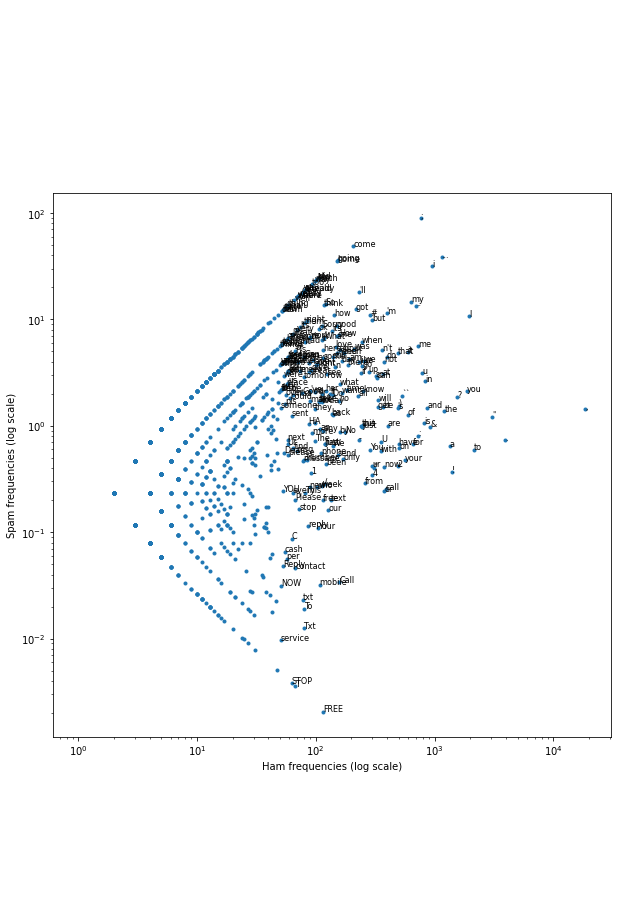

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.loglog(counts.d1+counts.d2, counts.d1/d1.N()/counts.d2*d2.N(),'.')
#ax.plot([1,1E-1], [1,1E-1], color='k', linestyle='-',linewidth=0.5)
ax.set_xlabel('Ham frequencies (log scale)')
ax.set_ylabel('Spam frequencies (log scale)')
for i in counts.index:
    if counts.loc[i, "d1"] + counts.loc[i, "d2"] >=50 :
       ax.annotate( counts.loc[i,"word"], (counts.loc[i, "d1"]+counts.loc[i, "d2"], 
                (counts.loc[i, "d1"]+.01)/d1.N()/(counts.loc[i,"d2"]+.01)*d2.N()), fontsize=8 )